# Skin Disorder Prediction

Objective : To develop and create a  model with optimum accuracy to classify Skin Diseases based on the given symptoms

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv("dataset_35_dermatology (1).csv")

## Data Analysis

In [3]:
data.head() #displaying the first 5 rows of the data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

Out of 35 features , 34 are of integer type and only Age is object type

In [5]:
data.shape

(366, 35)

There are 366 rows and 35 columns 

In [6]:
## data type
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [7]:
pd.set_option('display.max_columns',1000)

In [8]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


We can observe that , out of the numerical columns , all the columns have no complete 366 columns and no null values . 


In [9]:
data.dtypes.value_counts()

int64     34
object     1
dtype: int64

## Data Cleaning

In [10]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [11]:
data['Age'] = data['Age'].astype('str')

In [12]:
type(data['Age'])

pandas.core.series.Series

The Age has few enteries as ? , due to which it was throwing error to convert Age to int as it could not parse ? type . 

I have first changed all the rows which has ? as 0 

Then I have converted the data type of Age to Int 

Then I have filled the columns which has 0 to the mean of Age 

In [13]:
pd.set_option('display.max_rows',1000)

In [14]:
data.loc[data['Age']=='?','Age'] = 0

In [15]:
data['Age'] = data['Age'].astype('int')

In [16]:
Age_median = int(np.median(data['Age']).round()) ## As meidan is displaying a float value , ha to round off the value and wrapped data as an integer so it does not affect the data type of Age and remains Integer only 

In [17]:
Age_median

35

In [18]:
data.loc[data['Age']==0,'Age'] = Age_median

In [19]:
data['Age']

0      55
1       8
2      26
3      40
4      45
5      41
6      18
7      57
8      22
9      30
10     20
11     21
12     22
13     10
14     65
15     40
16     30
17     38
18     23
19     17
20      8
21     51
22     42
23     44
24     22
25     33
26     10
27     17
28     43
29     50
30     50
31     10
32     34
33     35
34     35
35     35
36     35
37     15
38     26
39     46
40     51
41     62
42     15
43     35
44     30
45     48
46     46
47     12
48     52
49     60
50     32
51     35
52     41
53     48
54     51
55     19
56     22
57     29
58     25
59     33
60      8
61     40
62     33
63     42
64     36
65     60
66     36
67     21
68     40
69     21
70     34
71     13
72     52
73     48
74     17
75     25
76     33
77     62
78     52
79     27
80     40
81     31
82     27
83     10
84     55
85     30
86     42
87     48
88     22
89     31
90     50
91     43
92     30
93     42
94     22
95     18
96     35
97     60
98     28
99     13


## Data Visualiation

In [20]:
# Currently we have only integer data type , as all the features are of int

In [21]:
data.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee_and_elbow_involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


<Figure size 640x480 with 0 Axes>

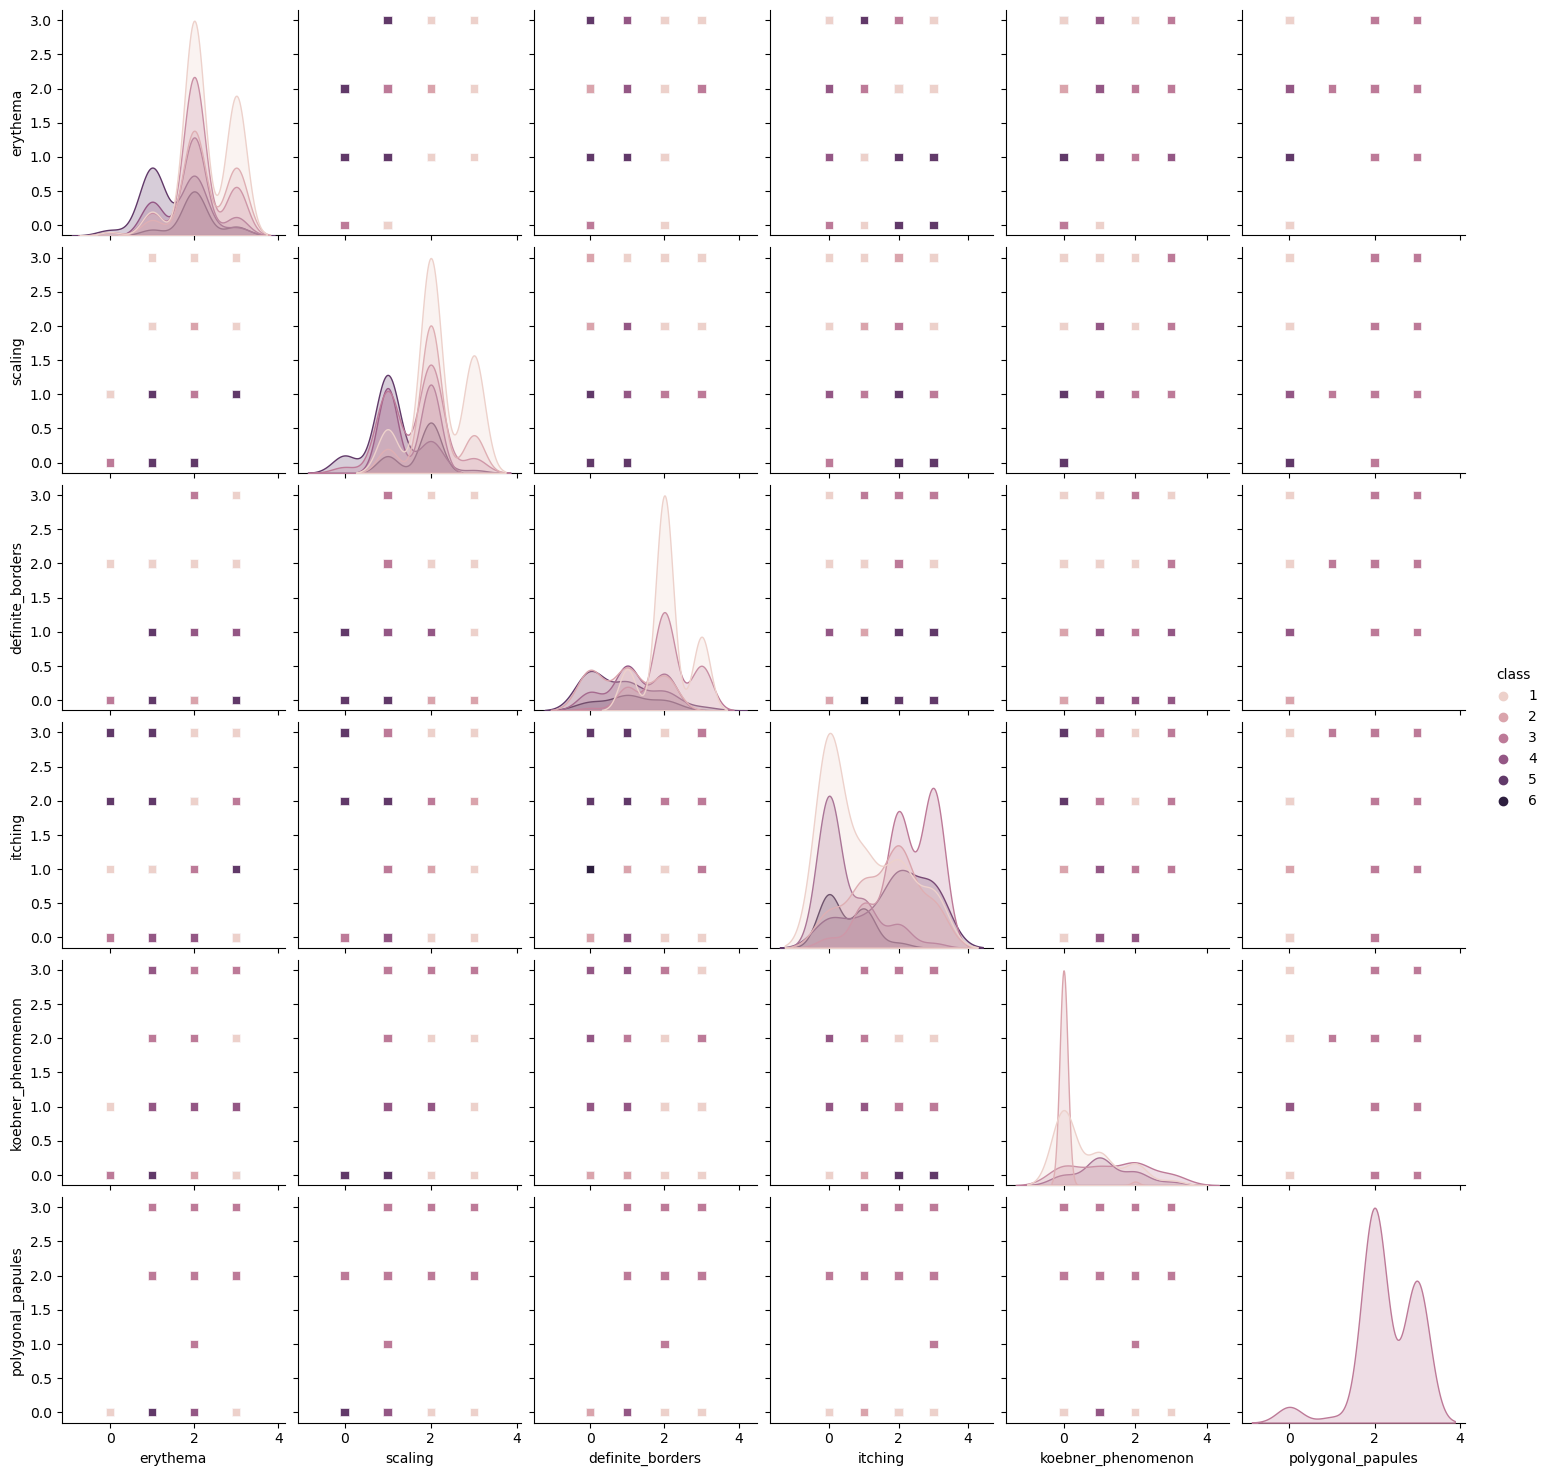

In [22]:
plt.figure()
sns.pairplot(data, vars=data.columns[0:6] , hue = "class", markers="s")
plt.show()

In [23]:
## Bar plot 

In [24]:
data.keys()

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

<AxesSubplot:xlabel='erythema'>

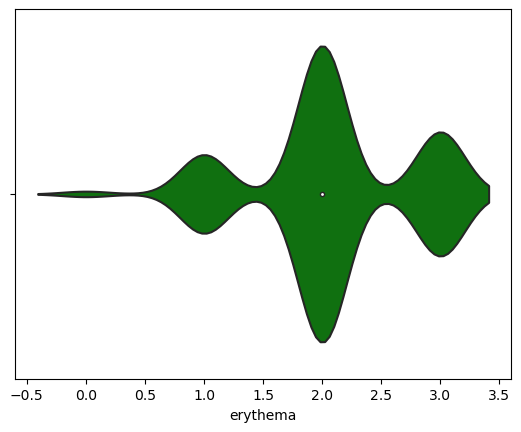

In [25]:

sns.violinplot(x=data['erythema'] , color='green')
        
    
    

1) We can observe that Type-2 of 'erythema' is the most common type of skin disease

In [26]:
# count plot 

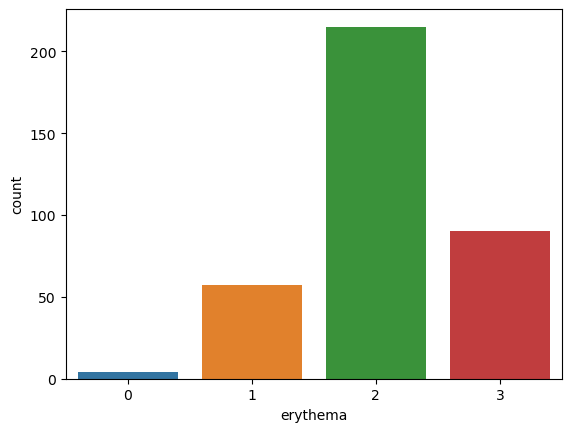

In [27]:
sns.countplot(x=data['erythema'])
plt.show()

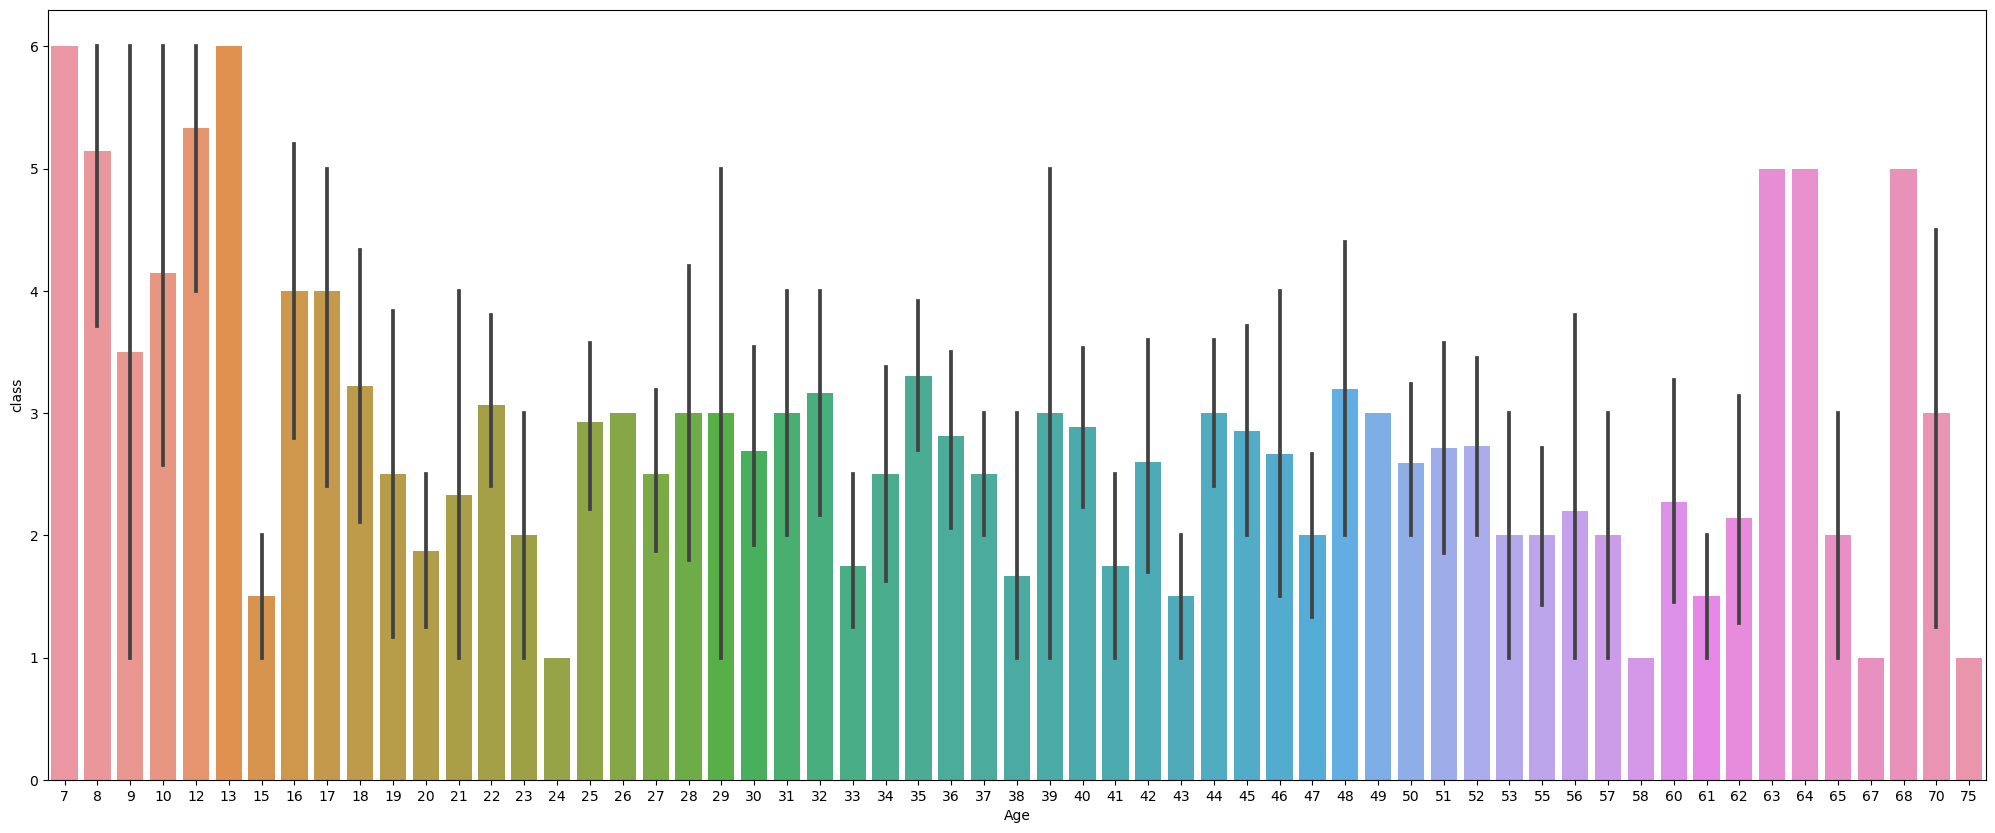

In [28]:
plt.figure(figsize=(25,10))
sns.barplot(data=data, x="Age", y="class")
plt.show()

1) We can observe that people around the Age (7-13) are commonly exposed to type-6 of skin disease

2) People around the age (8-10) ,(63-68) are most commonly exposed to type-5 of skin disease 

3) The most common form of skin disease id the Type-3 of class which varies around the age group of (16-59)

4) Type-1 of the class is the least exposed skin disease among people of varied ages

## Corelational Matrix / Heatmap

<AxesSubplot:>

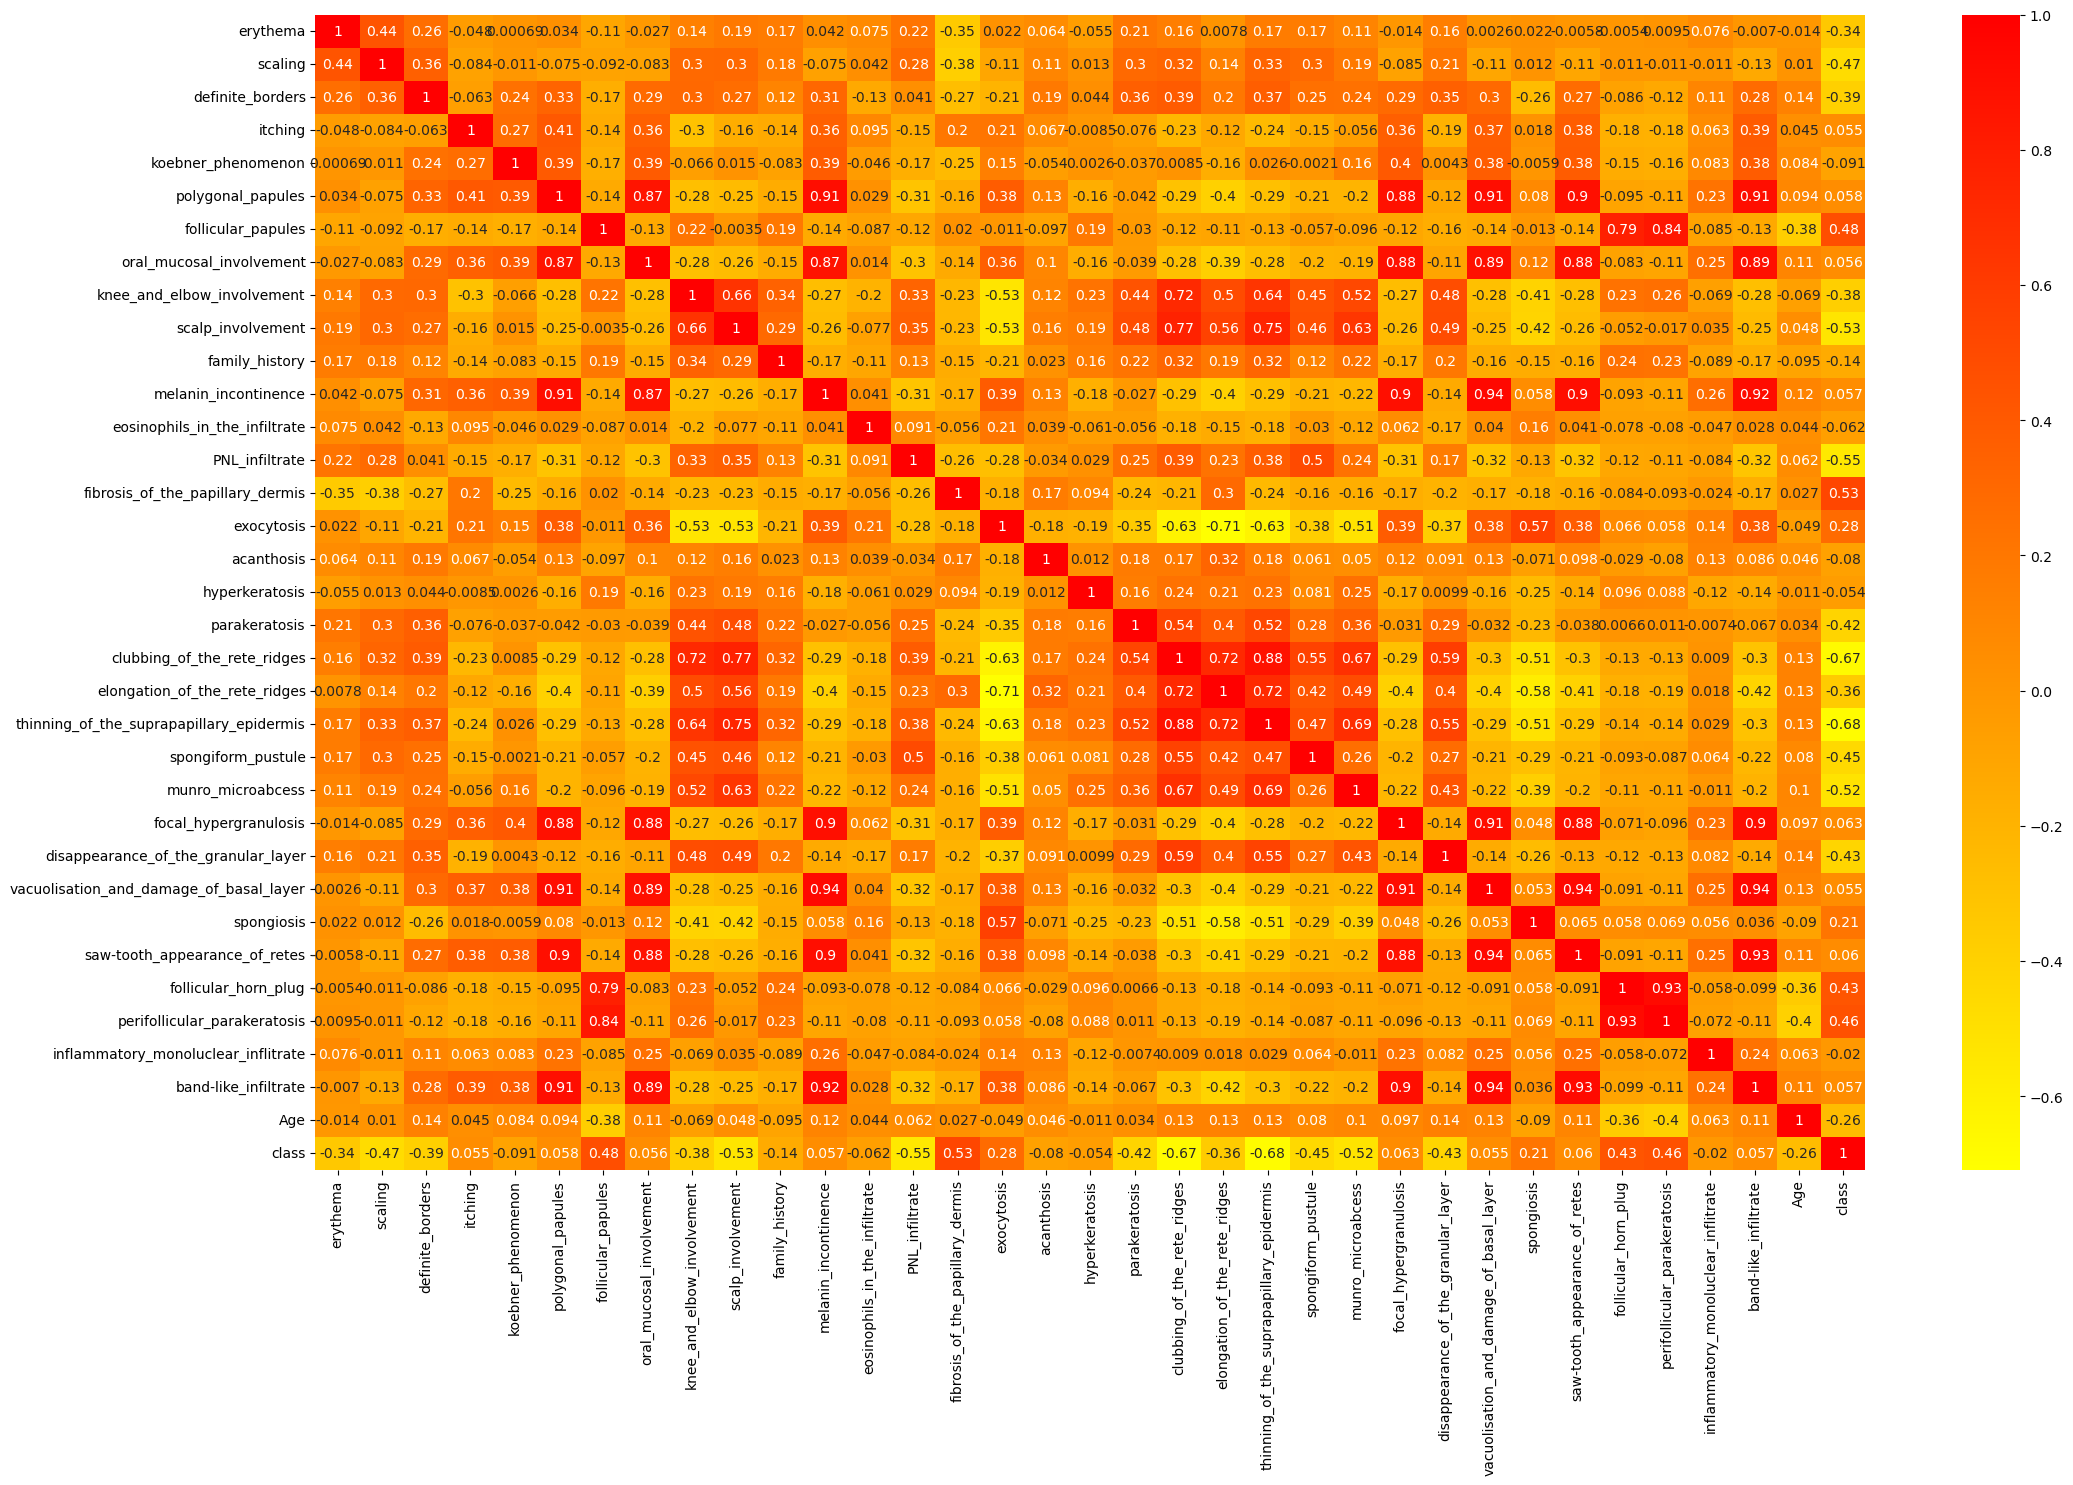

In [29]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True , cmap='autumn_r')

## Scaling the data 

In [30]:
# As age gas varied data , the target will give more preference to Age , so lets scaled the data , as all data will be treated with equal importance

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler

StandardScaler()

In [34]:
## Before we scaled , lets split the independent and dependent variable 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data.drop(columns='class') # class is the target variable

In [37]:
X

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30


In [38]:
y=data['class']

In [39]:
y

0      2
1      1
2      3
3      1
4      3
5      2
6      5
7      3
8      4
9      4
10     1
11     2
12     2
13     1
14     3
15     4
16     2
17     1
18     3
19     5
20     6
21     2
22     5
23     3
24     5
25     1
26     6
27     5
28     2
29     3
30     1
31     2
32     1
33     1
34     4
35     2
36     3
37     2
38     3
39     1
40     2
41     4
42     1
43     2
44     5
45     3
46     4
47     6
48     2
49     3
50     3
51     4
52     1
53     1
54     5
55     1
56     2
57     3
58     4
59     2
60     6
61     1
62     5
63     1
64     2
65     3
66     1
67     4
68     5
69     1
70     2
71     6
72     3
73     5
74     4
75     2
76     2
77     1
78     3
79     5
80     1
81     2
82     2
83     2
84     5
85     1
86     1
87     3
88     1
89     4
90     2
91     2
92     5
93     1
94     3
95     4
96     2
97     5
98     1
99     6
100    2
101    5
102    1
103    2
104    2
105    1
106    4
107    1
108    3
109    1
110    1
1

In [40]:
X_scaled = scaler.fit_transform(X.astype('float'))

In [41]:
X_scaled

array([[-0.1028946 ,  0.29250271, -1.70937509, ..., -1.19445878,
        -0.50221531,  1.24105006],
       [ 1.40348234,  1.71991595,  1.60084334, ..., -1.19445878,
        -0.50221531, -1.88877593],
       [-0.1028946 , -1.13491053,  0.49743719, ...,  0.18463243,
         2.2142005 , -0.69011917],
       ...,
       [ 1.40348234,  0.29250271,  0.49743719, ...,  0.18463243,
         2.2142005 , -0.55693509],
       [-0.1028946 , -1.13491053,  1.60084334, ...,  0.18463243,
         2.2142005 ,  0.90808985],
       [ 1.40348234,  0.29250271,  0.49743719, ...,  1.56372365,
        -0.50221531, -0.09079079]])

In [42]:
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.25,random_state=9)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(274, 34)
(274,)
(92, 34)
(92,)


In [44]:
# This is a classification algorithm as the class has values between [0-6]

## Model Preperation

#### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [46]:
knn=KNeighborsClassifier(n_neighbors=9, weights='uniform')

In [47]:
knn

KNeighborsClassifier(n_neighbors=9)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [49]:
y_pred_knn = knn.predict(X_test)

In [50]:
y_pred_knn

array([1, 1, 2, 1, 4, 2, 3, 2, 4, 3, 6, 3, 3, 1, 3, 6, 3, 1, 2, 4, 3, 1,
       5, 3, 3, 5, 4, 4, 2, 1, 3, 4, 2, 4, 5, 3, 3, 3, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 6, 3, 1, 1, 5, 4, 1, 2, 6, 5, 4, 2, 2, 5, 6, 3, 1, 4, 5,
       4, 4, 6, 5, 1, 1, 1, 4, 1, 1, 4, 5, 1, 1, 3, 6, 1, 1, 4, 1, 4, 1,
       2, 5, 1, 3], dtype=int64)

In [51]:
y_test

53     1
292    1
185    2
233    1
218    4
31     2
145    3
232    2
106    4
72     3
267    6
301    3
36     3
123    1
287    3
71     6
255    3
13     1
152    1
346    4
162    3
365    1
44     5
167    3
364    3
101    5
89     4
74     4
21     2
39     1
249    3
325    4
231    2
285    2
295    5
57     3
155    3
254    3
197    2
110    1
181    1
4      3
69     1
276    1
172    1
88     1
206    1
268    6
196    3
80     1
139    1
62     5
140    2
293    1
360    2
349    6
354    5
281    4
103    2
96     2
200    5
20     6
192    3
109    1
9      4
54     5
321    4
95     4
60     6
223    5
98     1
244    1
236    1
280    4
323    1
235    1
160    4
201    5
32     1
124    1
300    3
99     6
105    1
329    1
220    4
30     1
159    2
166    1
37     2
264    5
211    1
38     3
Name: class, dtype: int64

In [52]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn))

The accuracy score is :  0.9565217391304348


In [53]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.91      0.77      0.83        13
           3       1.00      1.00      1.00        18
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7

    accuracy                           0.96        92
   macro avg       0.95      0.96      0.95        92
weighted avg       0.96      0.96      0.96        92



##### SMOTE

In [54]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [55]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [56]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({1: 81, 3: 54, 2: 48, 5: 42, 4: 36, 6: 13})
SMOTE Classes Counter({4: 81, 1: 81, 3: 81, 2: 81, 6: 81, 5: 81})


In [57]:
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=9)

In [58]:
y_pred_knn2 = knn2.predict(X_test)

In [59]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn2))

The accuracy score is :  0.9565217391304348


## Logistic Regression

In [60]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
    
log_reg.fit(X_train,y_train)#training model with training data

LogisticRegression()

In [61]:
y_predLR = log_reg.predict(X_test)

In [62]:
y_predLR

array([1, 1, 2, 1, 4, 2, 3, 2, 4, 3, 6, 3, 3, 1, 3, 6, 3, 1, 1, 2, 3, 1,
       5, 3, 3, 5, 4, 4, 2, 1, 3, 4, 2, 4, 5, 3, 3, 3, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 6, 3, 1, 1, 5, 4, 1, 2, 6, 5, 4, 2, 2, 5, 6, 3, 1, 4, 5,
       4, 4, 6, 5, 1, 1, 1, 4, 1, 1, 4, 5, 1, 1, 3, 6, 1, 1, 4, 1, 2, 1,
       2, 5, 1, 3], dtype=int64)

In [63]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_predLR))

The accuracy score is :  0.967391304347826


In [64]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.92      0.85      0.88        13
           3       1.00      1.00      1.00        18
           4       0.86      0.92      0.89        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7

    accuracy                           0.97        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.97      0.97      0.97        92



#### Hyperparameter Tuning for Logistic Regression

In [65]:
# Logistic Regression
parameters=   {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 10000]
    }
print("The parameters are :" , parameters)
clf = RandomizedSearchCV(log_reg,parameters,random_state=0)
search=clf.fit(X_train,y_train)
print("The best parameters are - ", search.best_params_)
log_reg2 = LogisticRegression(solver = 'saga', penalty = 'none' , max_iter = 100, C = 0.615848211066026)
log_reg2.fit(X_train,y_train)
y_pred_LR2 = log_reg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_LR2)
print("Accuracy = ",accuracy)

The parameters are : {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 10000]}
The best parameters are -  {'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'C': 0.615848211066026}
Accuracy =  0.967391304347826


## Support Vector Machine(SVM)

In [66]:
from sklearn.svm import SVC
svclassifier = SVC()

In [67]:
svclassifier

SVC()

In [68]:
svclassifier.fit(X_train,y_train)

SVC()

In [69]:
y_predSVM=svclassifier.predict(X_test)

In [70]:
y_predSVM

array([1, 1, 2, 1, 4, 2, 3, 2, 4, 3, 6, 3, 3, 1, 3, 6, 3, 1, 1, 2, 3, 1,
       5, 3, 3, 5, 4, 4, 2, 1, 3, 4, 2, 4, 5, 3, 3, 3, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 6, 3, 1, 1, 5, 4, 1, 2, 6, 5, 4, 2, 2, 5, 6, 3, 1, 4, 5,
       4, 4, 6, 5, 1, 1, 1, 4, 1, 1, 4, 5, 1, 1, 3, 6, 1, 1, 4, 1, 2, 1,
       2, 5, 1, 3], dtype=int64)

In [71]:
print("The accuracy score is of SVM : ", accuracy_score(y_test,y_predSVM))

The accuracy score is of SVM :  0.967391304347826


In [72]:
svclassifier.fit(X_train_smote,y_train_smote)

SVC()

In [73]:
y_predSVM_smote = svclassifier.predict(X_test)

In [74]:
print("The accuracy score of SVM using SMOTE is : ", accuracy_score(y_test,y_predSVM_smote))

The accuracy score of SVM using SMOTE is :  0.967391304347826


In [75]:
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.92      0.85      0.88        13
           3       1.00      1.00      1.00        18
           4       0.86      0.92      0.89        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7

    accuracy                           0.97        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.97      0.97      0.97        92



#### Hyperparameter Tuning for SVM

In [76]:
# Logistic Regression
parameters =   {
        'C': np.logspace(-4, 4, 20),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 9))
    }
print("The parameters are :" , parameters)
clf = RandomizedSearchCV(svclassifier,parameters,random_state=0)
search=clf.fit(X_train,y_train)
print("The best parameters are - ", search.best_params_)
svclassifier2 = SVC(kernel= 'linear', gamma= 'auto', degree = 4, C = 206.913808111479)
svclassifier2.fit(X_train,y_train)
y_pred_svc2 = svclassifier2.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_svc2)
print("Accuracy = ",accuracy)

The parameters are : {'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
The best parameters are -  {'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'C': 206.913808111479}
Accuracy =  0.967391304347826


## Bagging

In [77]:
from sklearn.ensemble import BaggingClassifier

In [78]:
estimator_range=[2,4,6,8,10,12,14,16,18,20]

In [79]:
models = []
scores = []
for n_estimator in estimator_range:
    bagging = BaggingClassifier(n_estimators=n_estimator , random_state=22)
    bagging.fit(X_train , y_train)
    y_pred = bagging.predict(X_test)
    models.append(bagging)
    scores.append(accuracy_score(y_test,y_pred))
print("Models : ", models)
print("Scores : ",scores)

Models :  [BaggingClassifier(n_estimators=2, random_state=22), BaggingClassifier(n_estimators=4, random_state=22), BaggingClassifier(n_estimators=6, random_state=22), BaggingClassifier(n_estimators=8, random_state=22), BaggingClassifier(random_state=22), BaggingClassifier(n_estimators=12, random_state=22), BaggingClassifier(n_estimators=14, random_state=22), BaggingClassifier(n_estimators=16, random_state=22), BaggingClassifier(n_estimators=18, random_state=22), BaggingClassifier(n_estimators=20, random_state=22)]
Scores :  [0.9565217391304348, 0.9347826086956522, 0.9456521739130435, 0.9456521739130435, 0.9456521739130435, 0.9456521739130435, 0.9565217391304348, 0.9565217391304348, 0.967391304347826, 0.967391304347826]


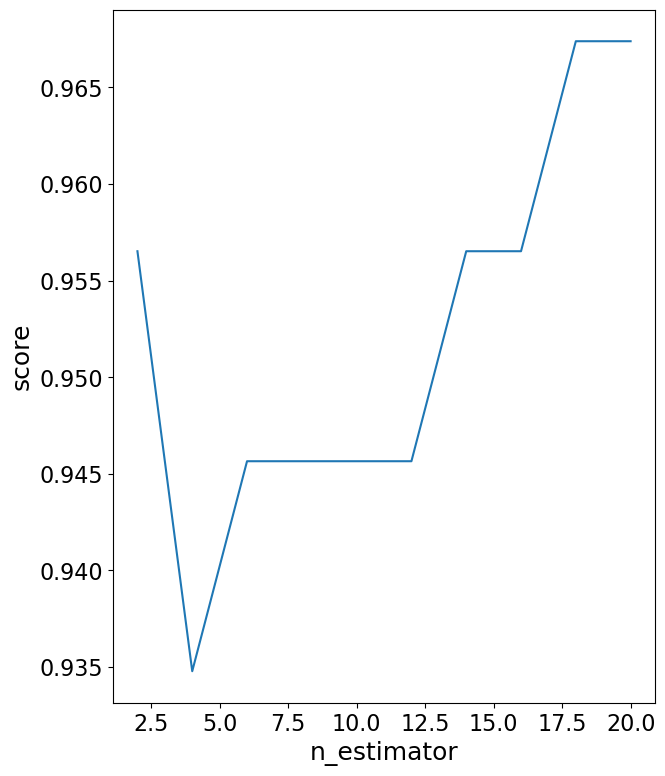

In [80]:
plt.figure(figsize=(7,9))
plt.plot(estimator_range,scores)

plt.xlabel("n_estimator", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()


In [81]:
bgclassifier = BaggingClassifier(base_estimator=log_reg, n_estimators=100,max_features=10,max_samples=100,random_state=1, n_jobs=5)
bgclassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=10,
                  max_samples=100, n_estimators=100, n_jobs=5, random_state=1)

In [82]:
y_pred_bag = bgclassifier.predict(X_test)

In [83]:
accuracy=accuracy_score(y_test,y_pred_bag)
accuracy

0.9782608695652174

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_pred_dt=dt.predict(X_test)#prediction
y_pred_dt#predicted values 

array([1, 1, 2, 1, 4, 2, 3, 2, 4, 3, 6, 3, 3, 1, 3, 6, 3, 1, 1, 4, 3, 1,
       5, 4, 3, 5, 4, 4, 1, 1, 3, 4, 2, 2, 5, 3, 3, 3, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 6, 3, 1, 1, 5, 4, 1, 2, 6, 5, 2, 2, 2, 5, 6, 3, 1, 4, 5,
       4, 4, 2, 5, 1, 1, 1, 4, 1, 1, 4, 5, 1, 1, 3, 6, 1, 1, 4, 1, 2, 1,
       2, 5, 1, 3], dtype=int64)

In [85]:
acc_train=accuracy_score(y_test,y_pred_dt)#checking accuracy
acc_train


0.9456521739130435

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [87]:
y_pred_rf=rf_clf.predict(X_test)#testing

In [88]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.967391304347826

In [89]:

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       0.92      0.85      0.88        13
           3       1.00      1.00      1.00        18
           4       0.92      0.92      0.92        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7

    accuracy                           0.97        92
   macro avg       0.97      0.96      0.96        92
weighted avg       0.97      0.97      0.97        92



In [90]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = accuracy_score(y_test,Y_pred_rf)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

0.9782608695652174
10


In [91]:
accuracy = accuracy_score(y_test,Y_pred_rf)

In [92]:
accuracy

0.9782608695652174

## Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
nb = GaussianNB()

In [95]:
nb.fit(X_train,y_train)

GaussianNB()

In [96]:
y_pred_nb = nb.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test,y_pred_nb)
accuracy

0.9130434782608695

##### Hyper parameter Tuning for NaiveBayes

In [98]:
# Naive Bayes
parameters =     {
        'var_smoothing': np.logspace(-12, -1, 12)
    }
print("The parameters are :" , parameters)
clf = RandomizedSearchCV(nb, parameters, random_state=0)
search = clf.fit(X_train,y_train)
print("The best parameters are - ", search.best_params_)
nb2 = GaussianNB(var_smoothing = 0.1)
nb2.fit(X_train,y_train)
y_pred_nb2 = nb2.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_nb2)
print("Accuracy = ",accuracy)



The parameters are : {'var_smoothing': array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05,
       1.e-04, 1.e-03, 1.e-02, 1.e-01])}
The best parameters are -  {'var_smoothing': 0.1}
Accuracy =  0.967391304347826


## Artificial Neural Network

In [99]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3), # 50 neurons, 3 hidden layers
                       learning_rate_init=0.1, #initial learning rate: controls the step-size in updating the weights
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data
y_pred_proba = model.predict_proba(X_test) ## predicting the probability of class
y_pred_ann = model.predict(X_test)
y_pred_ann

array([1, 1, 2, 1, 4, 2, 3, 2, 4, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 4, 3, 1,
       5, 3, 3, 5, 4, 4, 1, 1, 3, 4, 2, 4, 5, 3, 3, 3, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 5, 2, 1, 2, 3, 5, 4, 2, 2, 5, 6, 3, 1, 4, 5,
       4, 4, 3, 5, 1, 1, 1, 4, 1, 1, 4, 5, 1, 1, 3, 3, 1, 1, 4, 1, 4, 1,
       2, 5, 1, 3], dtype=int64)

In [100]:
y_train_predict = model.predict(X_train)

In [101]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_pred_ann))

Train accuracy : 0.927007299270073
Test accuracy : 0.9021739130434783


In [102]:
## getting the confusion matrix
pd.crosstab(y_test,y_pred_ann)

col_0,1,2,3,4,5,6
class,,,,,,
1,31,0,0,0,0,0
2,1,10,0,2,0,0
3,0,0,18,0,0,0
4,0,0,0,13,0,0
5,0,0,0,0,10,0
6,0,0,6,0,0,1


In [103]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.77      0.87        13
           3       0.75      1.00      0.86        18
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        10
           6       1.00      0.14      0.25         7

    accuracy                           0.90        92
   macro avg       0.93      0.82      0.81        92
weighted avg       0.92      0.90      0.88        92



## Analyzing the best fit Model 

In [105]:
print("KNN score : ")
print("-------------------------------------")
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn))
print('Classification report of KNN :')
print(classification_report(y_test,y_pred_knn))
print('\n')
print("Naive Bayes score : ")
print("-------------------------------------")
print("The accuracy score is : ", accuracy_score(y_test,y_pred_nb2))
print('Classification report of KNN :')
print(classification_report(y_test,y_pred_nb2))
print('\n')
print("Random Forest score : ")
print("-------------------------------------")
print("The accuracy score of Random Forest is : ", accuracy_score(y_test,Y_pred_rf))
print('Classification report of Random Forest :')
print(classification_report(y_test,Y_pred_rf))
print('\n')
print('\n')
print("Bagging  score : ")
print("-------------------------------------")
print("The accuracy score of Bagging : ", accuracy_score(y_test,y_pred_bag))
print('Classification report of Bagging :')
print(classification_report(y_test,y_pred_bag))
print('\n')
print("Support Vector Machine score : ")
print("-------------------------------------")
print("The accuracy score of SVM : ", accuracy_score(y_test,y_predSVM))
print('Classification report of SVM :')
print(classification_report(y_test,y_predSVM))
print('\n')
print("LogisticRegression  score : ")
print("-------------------------------------")
print("The accuracy score of LogisticRegression : ", accuracy_score(y_test,y_predLR))
print('Classification report of LogisticRegression :')
print(classification_report(y_test,y_predLR))
print('\n')
print("The accuracy score of Artificial Neural Network : ", accuracy_score(y_test,y_pred_ann))
print('Classification report of ANN :')
print(classification_report(y_test,y_pred_ann))
print('\n')


KNN score : 
-------------------------------------
The accuracy score is :  0.9565217391304348
Classification report of KNN :
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.91      0.77      0.83        13
           3       1.00      1.00      1.00        18
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7

    accuracy                           0.96        92
   macro avg       0.95      0.96      0.95        92
weighted avg       0.96      0.96      0.96        92



Naive Bayes score : 
-------------------------------------
The accuracy score is :  0.967391304347826
Classification report of KNN :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      0.77      0.87        13
           3       1.00      1.00

## Conclusion 


This notebooks measures the performance of the 7 predictive models - KNN , SVM , Logistic Regression , Naive Bayes , Random Forest , Decision Tree and ANN . Out of these 7 predictive models Bagging and Random Forst achives the highest accuracy of 97.8% followed by SVM , logistic Regression and Naive Bayes . ANN achieves the lease accuracy score of 90%

Experimental results may be useful to help prioritize scarce healthcare resources by assigning personalized risk scores using laboratory and blood analysis data .
Health care systems should explore the use of predictive models on individual erythema disease risk in order  to improve healthcare and prioritize patient care by early detection 
